# 데이터 전처리 Lab

In [2]:
import numpy as np 
import pandas as pd 

1. AWCustomersSales.csv 파일을 읽어서 customer_df에 저장하시오. 저장 후에 데이터의 특성을 탐색하시오.

In [3]:
customer_df = pd.read_csv('../../data/AWCustomersSales.csv')

2. Null value를 가진 컬럼들이 어떤 것들이 있는지 확인하시오. 또 각 컬럼별 null value의 수를 확인하시오.

In [4]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18361 entries, 0 to 18360
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerID            18361 non-null  int64  
 1   Title                 101 non-null    object 
 2   FirstName             18361 non-null  object 
 3   MiddleName            10572 non-null  object 
 4   LastName              18361 non-null  object 
 5   Suffix                3 non-null      object 
 6   AddressLine1          18361 non-null  object 
 7   AddressLine2          311 non-null    object 
 8   City                  18361 non-null  object 
 9   StateProvinceName     18361 non-null  object 
 10  CountryRegionName     18361 non-null  object 
 11  PostalCode            18361 non-null  object 
 12  PhoneNumber           18361 non-null  object 
 13  BirthDate             18361 non-null  object 
 14  Education             18361 non-null  object 
 15  Occupation         

3. BikeBuyer의 분포를 countplot() 함수를 이용하여 그리시오.

<AxesSubplot:xlabel='BikeBuyer', ylabel='count'>

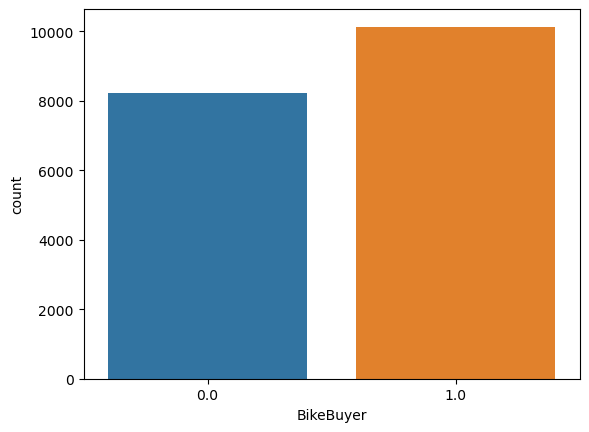

In [5]:
# countplot
import seaborn as sns

sns.countplot(x='BikeBuyer', data=customer_df)

4. Gender의 분포를 countplot() 함수를 이용하여 그리시오.

<AxesSubplot:xlabel='Gender', ylabel='count'>

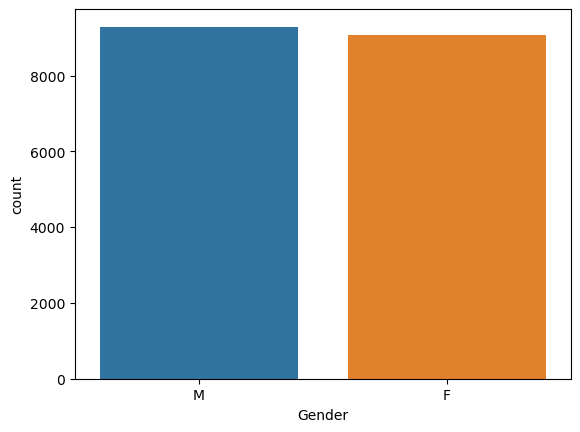

In [7]:
sns.countplot(x='Gender', data=customer_df)

5. AvgMonthSpend의 분포를 히스토그램을 이용하여 그리시오.

<AxesSubplot:xlabel='AvgMonthSpend', ylabel='Count'>

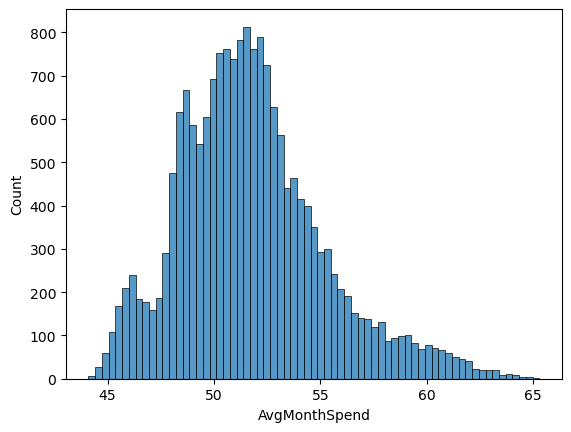

In [8]:
# AvgMonthSpend의 분포를 히스토그램을 이용하여 그리시오.
sns.histplot(x='AvgMonthSpend', data=customer_df)

6. AvgMonthSpend의 분포를 박스플랏을 이용하여 그리시오.

<AxesSubplot:xlabel='AvgMonthSpend'>

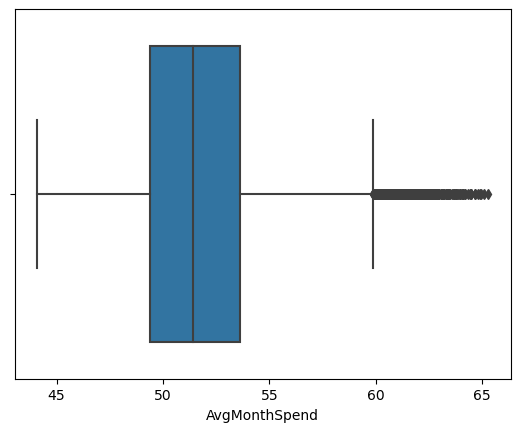

In [9]:
# AvgMonthSpend의 분포를 박스플랏을 이용하여 그리시오.
sns.boxplot(x='AvgMonthSpend', data=customer_df)

7. BikeBuyer 또는 AvgMonthSpend가 na인 행을 삭제하시오.(Hint. dropna() 함수의 subset=[] 인자 활용)

In [10]:
# BikeBuyer 또는 AvgMonthSpend가 na인 행을 삭제하시오.(Hint. dropna() 함수의 subset=[] 인자 활용)
customer_df = customer_df.dropna(subset=['BikeBuyer', 'AvgMonthSpend'])

8. CountryRegionName, BirthDate, Education, Occupation, Gender, MaritalStatus, HomeOwnerFlag, NumberCarsOwned,NumberChildrenAtHome, TotalChildren, YearlyIncome, BikeBuyer, AvgMonthSpend 컬럼만을 남기고 나머지 컬럼들을 제거하시오.

In [11]:
# CountryRegionName, BirthDate, Education, Occupation, Gender, MaritalStatus, HomeOwnerFlag, NumberCarsOwned,NumberChildrenAtHome, TotalChildren, YearlyIncome, BikeBuyer, AvgMonthSpend 컬럼만을 남기고 나머지 컬럼들을 제거하시오.
customer_df = customer_df[['CountryRegionName', 'BirthDate', 'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren', 'YearlyIncome', 'BikeBuyer', 'AvgMonthSpend']]
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18355 entries, 0 to 18354
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CountryRegionName     18355 non-null  object 
 1   BirthDate             18355 non-null  object 
 2   Education             18355 non-null  object 
 3   Occupation            18355 non-null  object 
 4   Gender                18355 non-null  object 
 5   MaritalStatus         18355 non-null  object 
 6   HomeOwnerFlag         18355 non-null  int64  
 7   NumberCarsOwned       18355 non-null  int64  
 8   NumberChildrenAtHome  18355 non-null  int64  
 9   TotalChildren         18355 non-null  int64  
 10  YearlyIncome          18355 non-null  int64  
 11  BikeBuyer             18355 non-null  float64
 12  AvgMonthSpend         18355 non-null  float64
dtypes: float64(2), int64(5), object(6)
memory usage: 2.0+ MB


9. BirthDate를 이용하여 Age 컬럼을 만드시오(2024-년도). Age 컬럼이 잘 생성되었으면 BirthDate 컬럼을 삭제하시오(apply lamda를 사용하시오. 만일 a='1987-10-01' 라면, int(a[:4])는 정수 1987임).

In [12]:
# BirthDate를 이용하여 Age 컬럼을 만드시오(2024-년도). Age 컬럼이 잘 생성되었으면 BirthDate 컬럼을 삭제하시오(apply lamda를 사용하시오. 만일 a='1987-10-01' 라면, int(a[:4])는 정수 1987임).
customer_df['Age'] = customer_df['BirthDate'].apply(lambda x: 2024 - int(x[:4]))
customer_df = customer_df.drop('BirthDate', axis=1)

In [13]:
customer_df.shape

(18355, 13)

10. 전처리된 데이터를 customer_na.csv 파일에 저장하시오.

In [20]:
# 전처리된 데이터를 customer_na.csv 파일에 저장하시오.
customer_df.to_csv('./data/res/customer_na.csv', index=False)